# Pergunta 1 e 2

<BarContainer object of 13 artists>

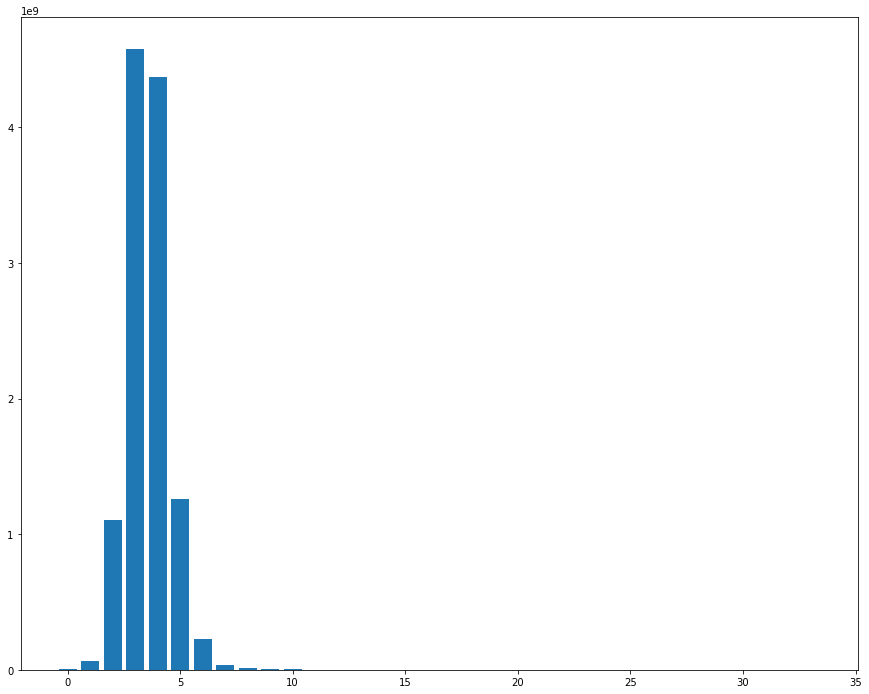

In [19]:
import pandas as pd 
from matplotlib import pyplot as plt

dataAula3 = pd.read_csv( 'C:/Users/PICHAU/Desktop/AnaliseDeDados/DataAnalysis/datasets/kc_house_data.csv' )

dataAula3['dormitory_type'] = 'standard'

dataAula3.loc[dataAula3['bedrooms']==1,'dormitory_type'] = 'studio'
dataAula3.loc[dataAula3['bedrooms']==2,'dormitory_type'] = 'apartament'
dataAula3.loc[dataAula3['bedrooms']>=1,'dormitory_type'] = 'house'

priceByBedrooms = dataAula3[['price','bedrooms']].groupby( 'bedrooms' ).sum().reset_index()

pd.set_option('display.float_format', lambda x: '%.2f' % x)

plt.figure( figsize=(15, 12) )
plt.bar( priceByBedrooms['bedrooms'], priceByBedrooms['price'] )

# Pergunta 3

<BarContainer object of 2 artists>

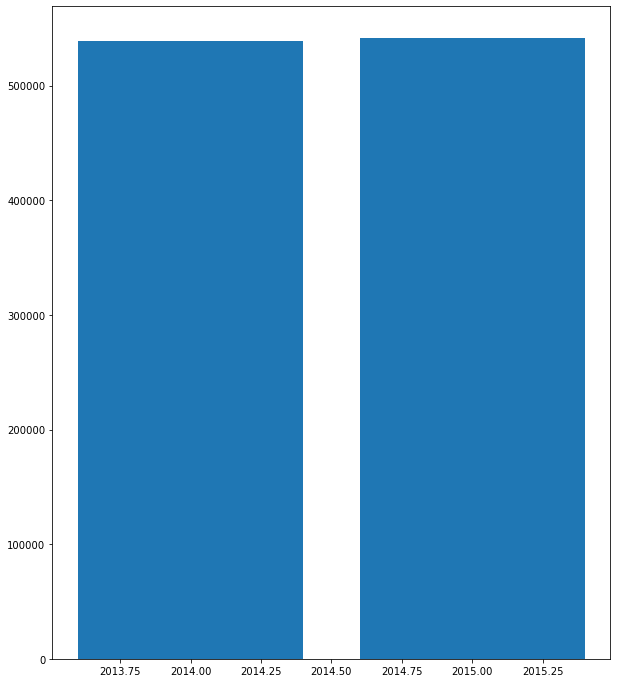

In [29]:
dataAula3['year'] = pd.to_datetime(dataAula3['date']).dt.year

by_year = dataAula3[['price','year']].groupby( 'year' ).mean().reset_index()

plt.figure( figsize=(10,12) )
plt.bar( by_year['year'], by_year['price'] )
